In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

# Seung Yeop, Seon
# 20144753
# https://github.com/SYseon/Assignment-05

x_derivative(image):

The image is taken and the derivative value is obtained.

In [21]:
def x_derivative(image):
    ker = np.array([[1,-1,0],[1,-1,0],[1,-1,0]]) 
    temp = signal.convolve2d(image, ker, boundary='symm', mode='same')
    
    return temp

y_derivative(image):

The image is taken and the derivative value is obtained.

In [22]:
def y_derivative(image):
    temp_image= np.array(image.T)
    ker= np.array([[1,-1,0],[1,-1,0],[1,-1,0]]) 
    temp= signal.convolve2d(temp_image, ker, boundary='symm', mode='same')
    
    return temp.T

abs_gradient(x_data, y_data):
Gets the size of the gradient.

In [23]:
def abs_gradient(x_data, y_data):
    temp = np.empty(x_data.shape)
    for i in range(x_data.shape[0]):
        for j in range(x_data.shape[1]):
            temp[i][j] = ((x_data[i][j]**2)+(y_data[i][j]**2))**(1/2)
    
    return temp

dir_gradient(x_data, y_data): Gets the direction of the gradient.

In [24]:
def dir_gradient(x_data, y_data):
    x_data=np.where(x_data==0, 0.0000001, x_data)
    return np.arctan(y_data/x_data)

show_image: 
This function prints an image.

In [25]:
def show_image(data, subtitle, color):
    if color == "gray":
        print('\n\n-',subtitle)
        plt.imshow(data, cmap='gray')
        plt.show()
    elif color == "blue":
        print('\n\n-',subtitle)
        plt.imshow(data, cmap='Blues')
        plt.show()
    elif color == "red":
        print('\n\n-',subtitle)
        plt.imshow(data, cmap='Reds')
        plt.show()
    elif color == "green":
        print('\n\n-',subtitle)
        plt.imshow(data, cmap='Greens')
        plt.show()
    else:
        print('\n\n-',subtitle)
        plt.imshow(data)
        plt.show()

model(data, color): 
We ran each function appropriately.

In [30]:
def model(data, color):
        
    der_x=x_derivative(data)
    der_y=y_derivative(data)
    boundary_image=abs_gradient(der_x, der_y)
    direction_grad=dir_gradient(der_x, der_y)    
    smoothing_ker = np.zeros((100,100))
    smoothing_ker = np.where(smoothing_ker==0,1/100,1/100)
    my_ker = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) 
    im_smooth	= signal.convolve2d(data, smoothing_ker, boundary='symm', mode='same')
    im_my	= signal.convolve2d(data, my_ker, boundary='symm', mode='same')
    show_image(data,'basis image (input:'+color+')', color)
    show_image(der_x,'derivative in x-direction (input:'+color+')', color)
    show_image(der_y, 'derivative in y-direction (input:'+color+')', color)
    show_image(boundary_image,'absolute value of gradient (input:'+color+')', color)
    x=np.linspace(0,1967,100)
    y=np.linspace(0,1346,100)
    der_x=np.where(der_x==0, 0.000001, der_x)
    for j in x:
        for k in y:
            plt.quiver(j,y.max()-k,der_x[int(k)][int(j)],der_y[int(k)][int(j)], pivot='mid', width=0.0005)
    print('\n\n- direction of gradient (vector field, input:'+color,')')
    plt.show()
    show_image(direction_grad, 'direction of gradient (input:'+color+')', color)
    show_image(im_smooth,'result image with smoothing kernel (input:'+color+')',color)
    show_image(im_my,'result image with my own kernel (input:'+color+')',color)
    
    



- color image


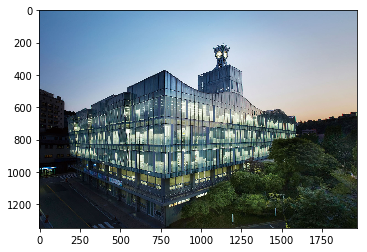



- basis image (input:red)


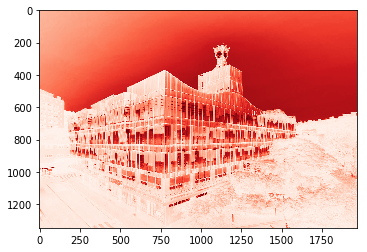



- derivative in x-direction (input:red)


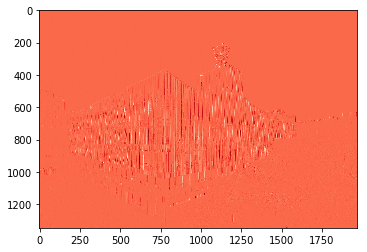



- derivative in y-direction (input:red)


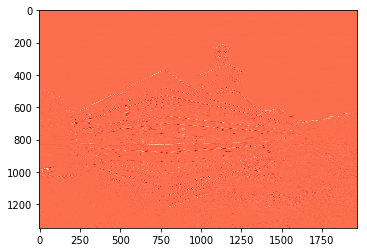



- absolute value of gradient (input:red)


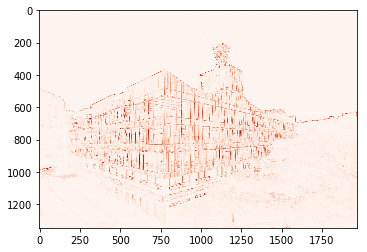



- direction of gradient (vector field, input:red )


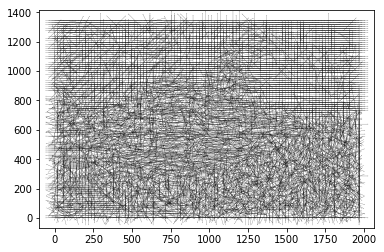



- direction of gradient (input:red)


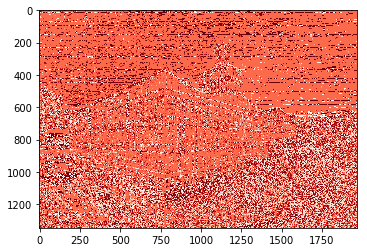



- result image with smoothing kernel (input:red)


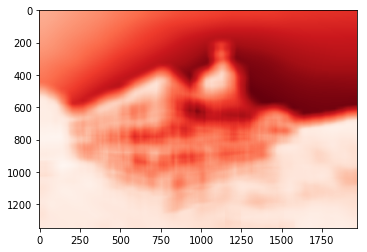



- result image with my own kernel (input:red)


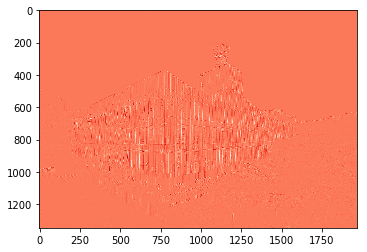



- basis image (input:green)


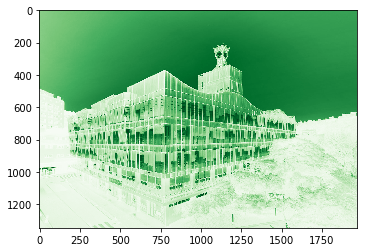



- derivative in x-direction (input:green)


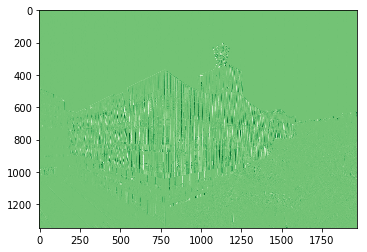



- derivative in y-direction (input:green)


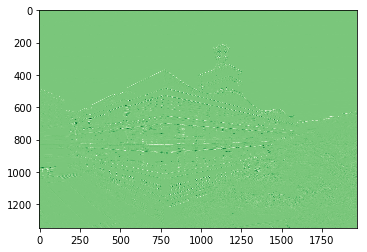



- absolute value of gradient (input:green)


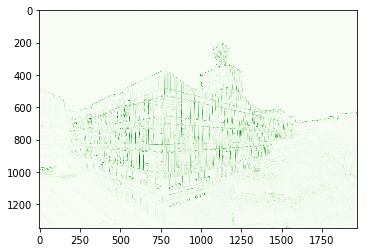



- direction of gradient (vector field, input:green )


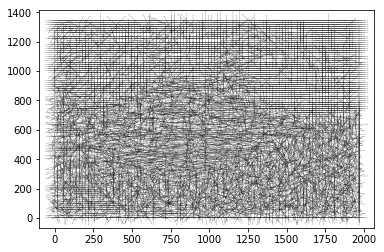



- direction of gradient (input:green)


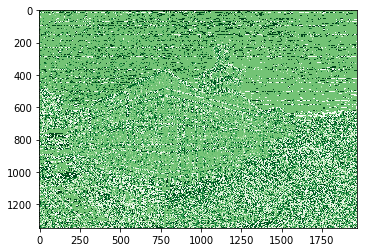



- result image with smoothing kernel (input:green)


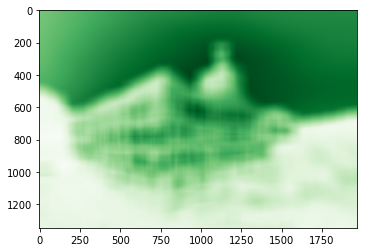



- result image with my own kernel (input:green)


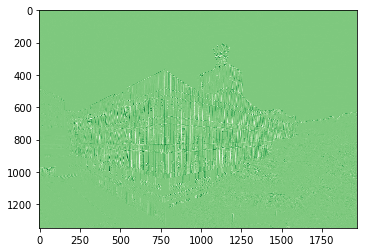



- basis image (input:blue)


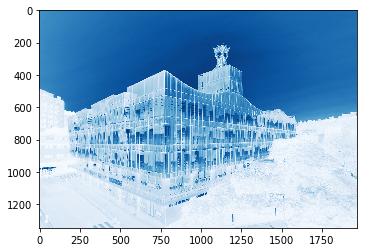



- derivative in x-direction (input:blue)


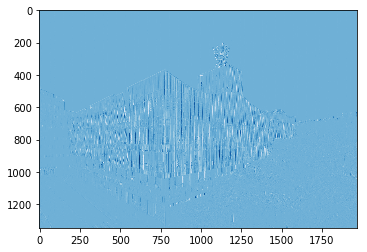



- derivative in y-direction (input:blue)


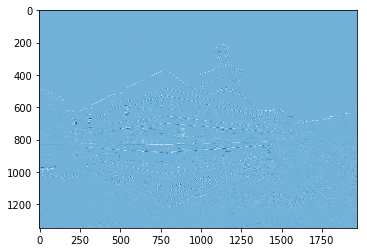



- absolute value of gradient (input:blue)


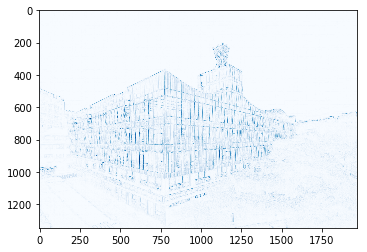



- direction of gradient (vector field, input:blue )


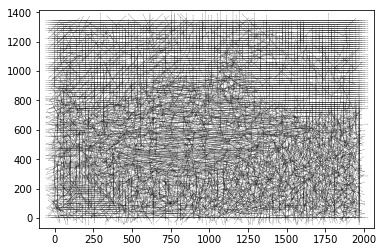



- direction of gradient (input:blue)


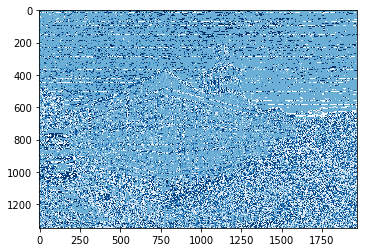



- result image with smoothing kernel (input:blue)


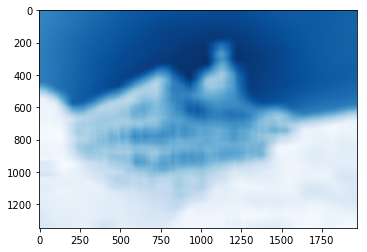



- result image with my own kernel (input:blue)


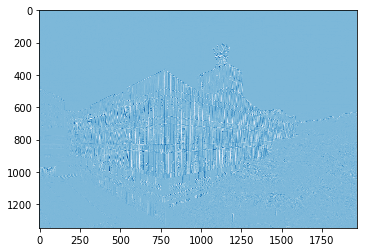



- basis image (input:gray)


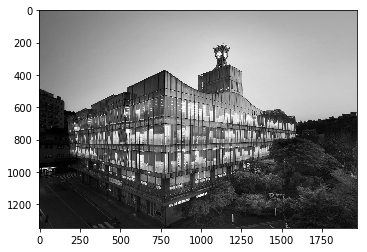



- derivative in x-direction (input:gray)


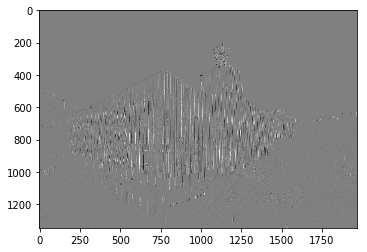



- derivative in y-direction (input:gray)


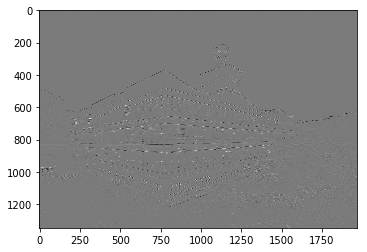



- absolute value of gradient (input:gray)


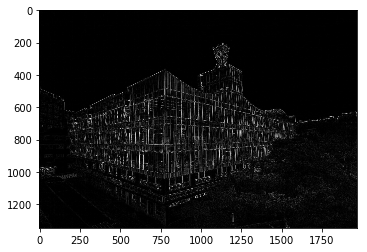



- direction of gradient (vector field, input:gray )


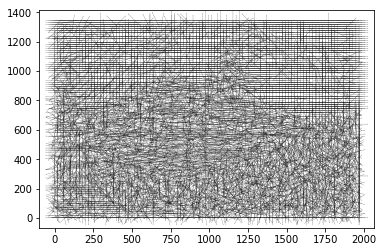



- direction of gradient (input:gray)


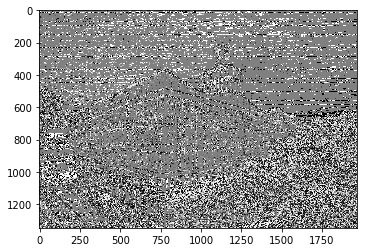



- result image with smoothing kernel (input:gray)


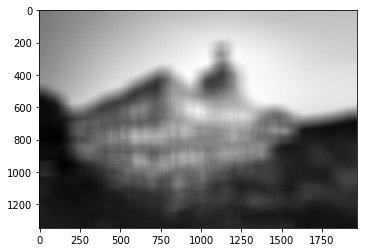



- result image with my own kernel (input:gray)


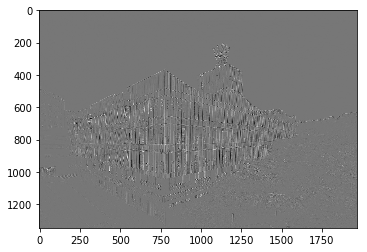

In [31]:
file_image	= 'cau.jpg'
im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
index_color=['red','green','blue','gray']
show_image(im_color,'color image', "color")
for i in range(4):
    if i<3:
        model(im_color.T[i].T, index_color[i])
    else:
        model(im_gray, index_color[i])